<a href="https://colab.research.google.com/github/Salty-duck0/price-prediction-using-LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense ,LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Salty-duck0/price-prediction-using-LSTM/main/data/TATA-STEEL.csv")

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

data_vwap = data.filter(['VWAP'])
ds_vwap = data_vwap.values
scaled_vwap = scaler.fit_transform(ds_vwap)

data_macd = data.filter(['MACD'])
ds_macd = data_macd.values
scaled_macd = scaler.fit_transform(ds_macd)

data_dpo = data.filter(['DPO'])
ds_dpo = data_dpo.values
scaled_dpo = scaler.fit_transform(ds_dpo)


data_hull = data.filter(['HULL-16'])
ds_hull = data_hull.values
scaled_hull = scaler.fit_transform(ds_hull)

data_mfm = data.filter(['MFM'])
ds_mfm = data_mfm.values
scaled_mfm = scaler.fit_transform(ds_mfm)

data_close = data.filter(['Close'])
ds_close = data_close.values/405.

In [ ]:
ds = np.concatenate((ds_close,scaled_vwap,scaled_macd,scaled_dpo,scaled_hull,scaled_mfm),axis=1)
print(ds.shape)

(5280, 6)


In [ ]:
train_len = math.ceil(len(ds)*.8)
train_data = ds[0:train_len,:]

In [ ]:
from sklearn.utils import shuffle
x_train=[]
y_train=[]
for i in range(80,len(train_data)):
  x_train.append(train_data[i-80:i,:])
  y_train.append(train_data[i,0])
x_train,y_train =np.array(x_train),np.array(y_train)


In [ ]:
model= Sequential()
model.add(LSTM(75,return_sequences=True,input_shape=(x_train.shape[1],6),dropout=0.15))
model.add(LSTM(50,return_sequences=False,dropout=0.15))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',metrics='mean_absolute_percentage_error',loss='mean_absolute_error')
model.fit(x_train,y_train,batch_size=32,epochs=8)

Epoch 1/8
130/130 [==============================] - 33s 190ms/step - loss: 0.1081 - mean_absolute_percentage_error: 12.7154
Epoch 2/8
130/130 [==============================] - 13s 102ms/step - loss: 0.0697 - mean_absolute_percentage_error: 7.8908
Epoch 3/8
130/130 [==============================] - 13s 103ms/step - loss: 0.0717 - mean_absolute_percentage_error: 8.1733
Epoch 4/8
130/130 [==============================] - 14s 106ms/step - loss: 0.0675 - mean_absolute_percentage_error: 7.6000
Epoch 5/8
130/130 [==============================] - 14s 109ms/step - loss: 0.0674 - mean_absolute_percentage_error: 7.6386
Epoch 6/8
130/130 [==============================] - 13s 103ms/step - loss: 0.0676 - mean_absolute_percentage_error: 7.5018
Epoch 7/8
130/130 [==============================] - 13s 103ms/step - loss: 0.0625 - mean_absolute_percentage_error: 7.0279
Epoch 8/8
130/130 [==============================] - 14s 106ms/step - loss: 0.0620 - mean_absolute_percentage_error: 7.1152


In [ ]:
x_test=[]
y_test=[]
test_data=ds[train_len:,:]
for i in range(80,len(test_data)):
  x_test.append(test_data[i-80:i,:])
  y_test.append(test_data[i,0])
x_test,y_test =np.array(x_test),np.array(y_test)
y_test = y_test * 405

In [ ]:
pred = model.predict(x_test)
pred = pred*405.

31/31 [==============================] - 2s 28ms/step


<ipython-input-10-ef13769b624d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= pred


<function matplotlib.pyplot.show(close=None, block=None)>

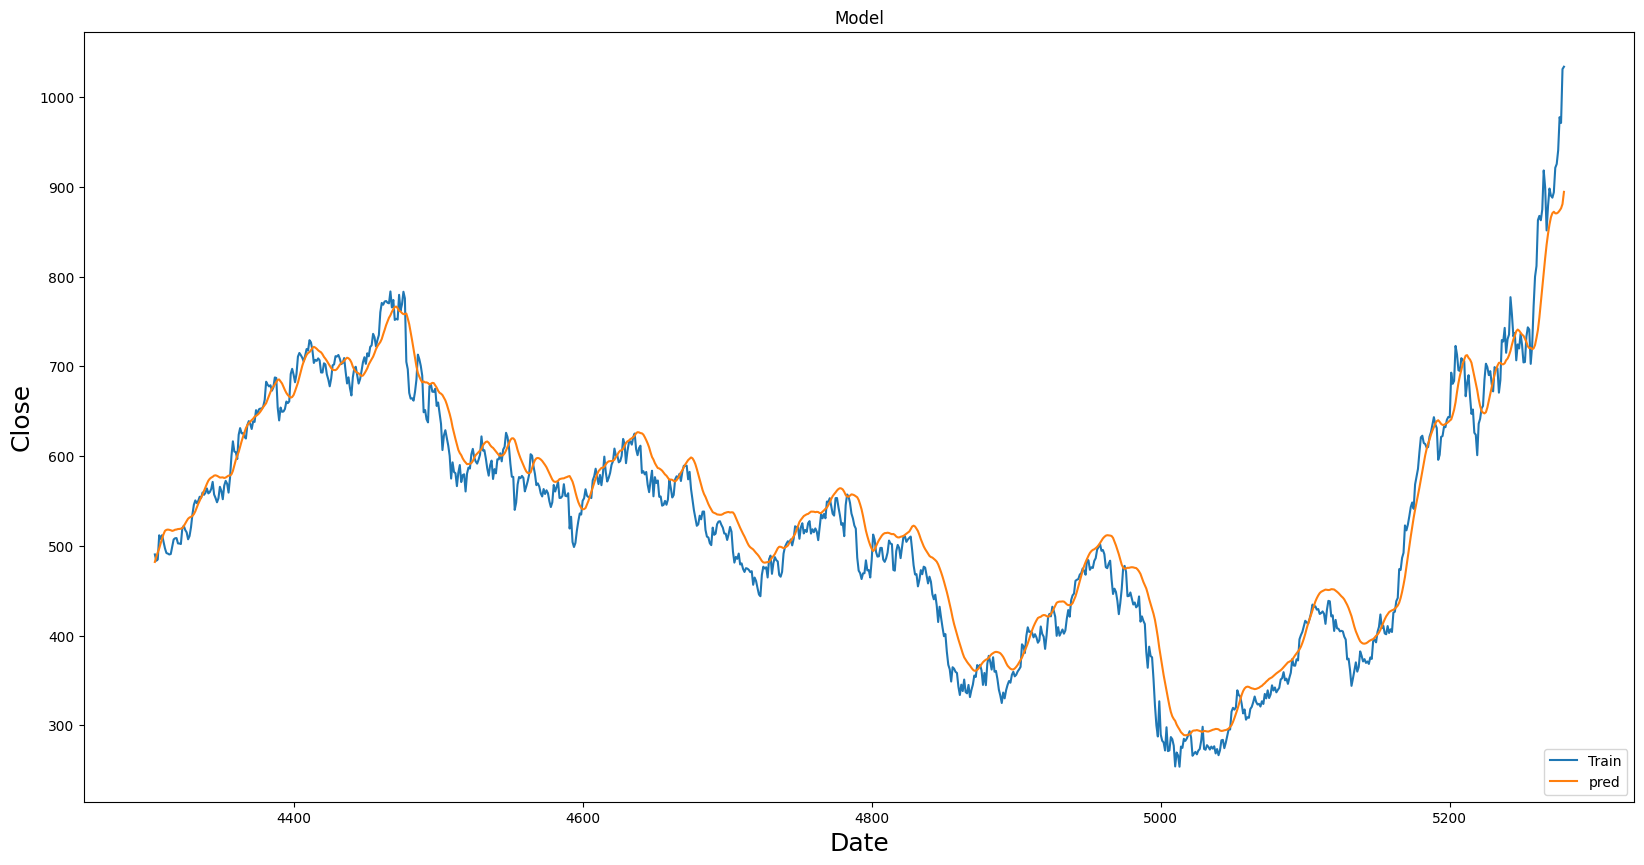

In [ ]:
train = data[:train_len]
valid = data[train_len+80:]
valid['Predictions']= pred
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
valid = valid
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','pred'],loc='lower right')
plt.show